<h1>Titanic Survival prediction</h1><br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

<h2>Import the data</h2>

In [3]:
df=pd.read_csv("data/titanic dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

The Data is 891 rows and 12 columns.<br>

<h2>Data Preprocessing </h2>

This part is data visualization of given data and more understanding with model.

Percentage of Male : 65 %
Percentage of Female : 35 %


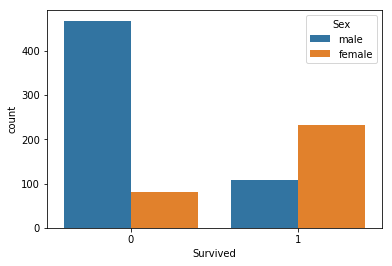

In [5]:
sns.countplot(df['Survived'],hue=df['Sex'])
Dead, lives = df.Survived.value_counts()
male, female = df.Sex.value_counts()
print("Percentage of Male :", round(male/(male+female)*100),'%' )
print("Percentage of Female :", round(female/(male+female)*100 ),'%')

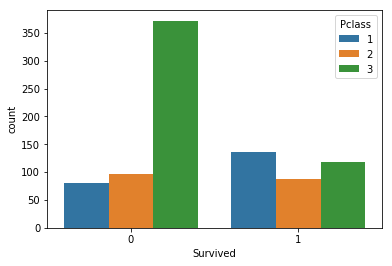

In [6]:
sns.countplot(df['Survived'],hue=df['Pclass'])

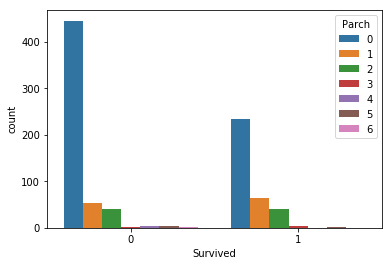

In [7]:
sns.countplot(df['Survived'],hue=df['Parch'])

In [8]:
df.replace('male',1, inplace=True)
df.replace('female',0,inplace=True)

In Age column have some NaN values(No values), then print mean value in Age column.

In [9]:
not_zero = ['Age']

for column in not_zero:
    df[column] = df[column]
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN,mean)

Choose the column for train and test data

In [10]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y=df.Survived

<h2>Split the Data</h2> 

split the data using train_test_split method.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

<h2>Decision Tree</h2>

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<h2>Make a Prediction</h2>

Let make prediction with decision tree model.

In [13]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)

<h2>Evaluate the score</h2>

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.8491620111731844

Its better accuracy for decision tree algorithm.

<h2>Final Prediction</h2>

Check the value of prediction is correct or not.

In [15]:
pred=model.predict([[1,0,38.0,1,0,71.2833]])
if pred ==1:
    print("The person is Survived")
else:
    print("The person is not Survived")
pred

The person is Survived


array([1], dtype=int64)

In [16]:
pred=model.predict([[1,1,55.0,1,0,80.233]])
if pred ==1:
    print("The person is Survived")
else:
    print("The person is not Survived")
pred

The person is not Survived


array([0], dtype=int64)

The prediction value is correct.<br><br><br><br><br><br>

<h2>Conculsion:</h2><br>

<h4>In this Machine learning project is How many people survied in titanic ship and make a prediction with Decision Tree Algorithm.</h4>